Load modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

#2. Load the data

In [2]:
df_dnm = pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_dnm.tsv")
df_dnm

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
df_parental_age = pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_parental_age.tsv")
df_parental_age

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


#3. Count the number of mutations per proband, and break down into maternally inherited, paternally inherited, and total de novo mutations (including of unknown parental origin).
Store these counts in a new pandas dataframe with columns: Proband_id, pat_dnm, mat_dnm, tot_dnm.

In [26]:
df_tot_counts = df_dnm["Proband_id"].value_counts()
df_tot_counts

91410     122
114094    121
111288    115
8147      114
88246     113
         ... 
121087     37
62630      34
76504      34
37789      34
13990      33
Name: Proband_id, Length: 396, dtype: int64

In [15]:
df_dnm.groupby(by="Phase_combined")["Proband_id"].value_counts()

Phase_combined  Proband_id
father          91410         111
                114094         98
                111288         93
                99984          91
                64166          88
                             ... 
mother          137878          4
                37789           3
                113829          3
                130614          3
                121087          1
Name: Proband_id, Length: 792, dtype: int64

In [19]:
roi_father = df_dnm["Phase_combined"] == "father"
df_dnm.loc[roi_father, :]

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
6,chr2,8091216,C,T,24464,father,paternal_crossover,confirmed
9,chr20,54477057,G,A,5494,father,paternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26425,chr9,137267012,T,C,96471,father,NaN,NaN
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [27]:
df_dnm_f_counts = df_dnm.loc[roi_father, :]["Proband_id"].value_counts()
df_dnm_f_counts 

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [20]:
roi_mother = df_dnm["Phase_combined"] == "mother"
df_dnm.loc[roi_mother, :]

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
5,chr18,6485766,C,T,4131,mother,maternal_crossover,confirmed
7,chr2,132183025,C,T,104665,mother,maternal_crossover,confirmed
8,chr2,157675775,T,C,5410,mother,maternal_crossover,PCR failed
...,...,...,...,...,...,...,...,...
26404,chr9,135404985,G,A,146353,mother,NaN,NaN
26405,chr9,135420020,G,C,84737,mother,NaN,NaN
26408,chr9,135532928,ATA,A,21286,mother,NaN,NaN
26410,chr9,135764888,G,GC,29874,mother,NaN,NaN


In [28]:
df_dnm_m_counts = df_dnm.loc[roi_mother, :]["Proband_id"].value_counts()
df_dnm_m_counts

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

In [53]:
#make new dataframe of series: paternal_dmn counts, maternal_dnm counts, and total dnms
df_counts = pd.DataFrame({"pat_dnm": df_dnm_f_counts, "mat_dnm": df_dnm_m_counts, "tot_dnm": df_tot_counts})
df_counts = df_counts.reset_index() #proband_id was the index, so pulling it out into new first column
df_counts.columns = ["Proband_id", "pat_dnm", "mat_dnm", "tot_dnm"]
df_counts

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,675,51,19,70
1,1097,26,12,39
2,1230,42,12,57
3,1481,53,14,68
4,1806,61,11,78
...,...,...,...,...
391,153657,41,8,49
392,154565,61,14,75
393,154621,39,11,50
394,154810,55,14,69


#4. Merge df_parental_age with new df

In [54]:
df_parental_age = pd.merge(df_parental_age, df_counts, on = "Proband_id")
df_parental_age

,Proband_id,Father_age,Mother_age,pat_dnm,mat_dnm,tot_dnm
0,675,31,36,51,19,70
1,1097,19,19,26,12,39
2,1230,30,28,42,12,57
3,1481,32,20,53,14,68
4,1806,38,34,61,11,78
...,...,...,...,...,...,...
391,153657,27,23,41,8,49
392,154565,36,30,61,14,75
393,154621,19,18,39,11,50
394,154810,32,28,55,14,69


#5. Plot maternal dnms vs maternal age, and paternal dnms vs paternal age

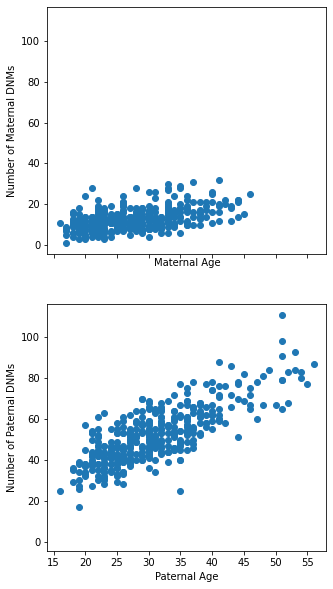

In [64]:
#maternal dnms vs maternal age
fig, ax = plt.subplots(figsize = (5, 10), nrows=2, sharex = True, sharey = True)
ax[0].scatter(x = df_parental_age["Mother_age"], 
           y = df_parental_age["mat_dnm"])
ax[0].set_xlabel("Maternal Age")
ax[0].set_ylabel("Number of Maternal DNMs")

ax[1].scatter(x = df_parental_age["Father_age"],
             y = df_parental_age["pat_dnm"])
ax[1].set_xlabel("Paternal Age")
ax[1].set_ylabel("Number of Paternal DNMs")

plt.show()
